In [12]:
# Part 1 - Data Cleaning
#load the data and examine its structure:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('bi.csv', encoding='1256')

# Check dataset structure
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (77, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None

First 5 rows:
       fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  Female        Norway    Private         72   
1       Alex   Walekhwa   60       M         Kenya  

In [13]:
#Which columns should be categorical and which should be numerical?

#Categorical: gender, country, residence, prevEducation

#Numerical: Age, entryEXAM, studyHOURS, Python, DB

In [14]:
#Detect and fix inconsistent categories:
# Check unique values for categorical columns
print("Gender unique values:", df['gender'].unique())
print("Country unique values:", df['country'].unique())
print("Previous Education unique values:", df['prevEducation'].unique())

# Fix gender inconsistencies
df['gender'] = df['gender'].str.strip().str.lower().replace({
    'm': 'male', 'f': 'female', 'male': 'male', 'female': 'female'
})

# Fix country inconsistencies
df['country'] = df['country'].str.strip().str.title().replace({
    'Rsa': 'South Africa', 'Norge': 'Norway', 'Norway': 'Norway',
    'Uganda': 'Uganda', 'Kenya': 'Kenya', 'South Africa': 'South Africa',
    'Denmark': 'Denmark', 'Netherlands': 'Netherlands', 'Italy': 'Italy',
    'Spain': 'Spain', 'Uk': 'UK', 'Somali': 'Somalia', 'Nigeria': 'Nigeria',
    'Germany': 'Germany', 'France': 'France'
})

# Fix prevEducation inconsistencies
df['prevEducation'] = df['prevEducation'].str.strip().str.title().replace({
    'Barrrchelors': 'Bachelors', 'Diplomaaa': 'Diploma',
    'High School': 'High School', 'Highschool': 'High School',
    'Masters': 'Masters', 'Bachelors': 'Bachelors',
    'Diploma': 'Diploma', 'Doctorate': 'Doctorate'
})

# Fix residence inconsistencies
df['residence'] = df['residence'].str.strip().replace({
    'BI-Residence': 'BI Residence', 'BIResidence': 'BI Residence',
    'BI_Residence': 'BI Residence', 'Sognsvann': 'Sognsvann',
    'Private': 'Private'
})

Gender unique values: ['Female' 'M' 'Male' 'F' 'female' 'male']
Country unique values: ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
Previous Education unique values: ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [15]:
# Handle duplicates:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Number of duplicates: 0
Shape after removing duplicates: (77, 11)


In [16]:
# Part 2 - Missing Data
# Identify missing values:
print("Missing values:")
print(df.isnull().sum())

Missing values:
fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64


In [17]:
# Impute missing values:
# Fill numerical missing values with median (less sensitive to outliers)
df['Python'] = df['Python'].fillna(df['Python'].median())
df['DB'] = df['DB'].fillna(df['DB'].median())

# Check if any categorical columns have missing values
print("Categorical missing values after numerical imputation:")
print(df[['gender', 'country', 'residence', 'prevEducation']].isnull().sum())

Categorical missing values after numerical imputation:
gender           0
country          0
residence        0
prevEducation    0
dtype: int64


Study Hours summary:
count     77.000000
mean     149.714286
std       12.743272
min      114.000000
25%      144.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64

Python scores summary:
count    77.000000
mean     75.987013
std      15.228517
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

DB scores summary:
count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64


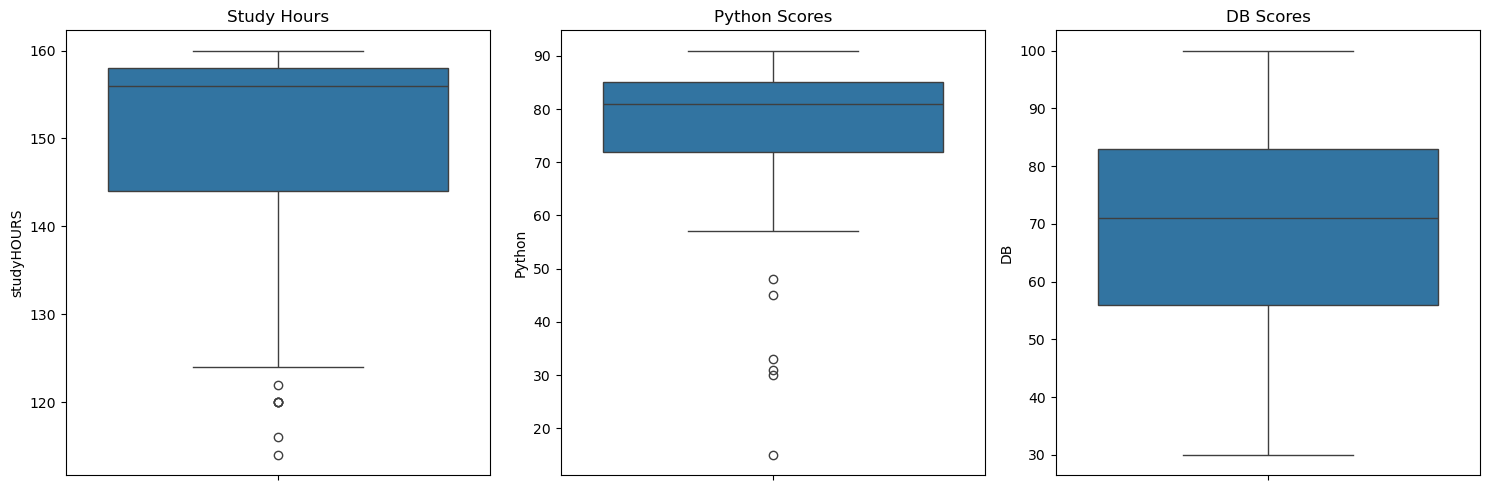

In [18]:
# Part 3 - Outliers
# Detect outliers:
# Summary statistics
print("Study Hours summary:")
print(df['studyHOURS'].describe())
print("\nPython scores summary:")
print(df['Python'].describe())
print("\nDB scores summary:")
print(df['DB'].describe())

# Boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['studyHOURS'])
plt.title('Study Hours')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Python'])
plt.title('Python Scores')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['DB'])
plt.title('DB Scores')
plt.tight_layout()
plt.show()

In [19]:
# Handle outliers using IQR method:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
original_shape = df.shape
df = remove_outliers_iqr(df, 'studyHOURS')
df = remove_outliers_iqr(df, 'Python')
df = remove_outliers_iqr(df, 'DB')
print(f"Removed {original_shape[0] - df.shape[0]} rows due to outliers")

Removed 13 rows due to outliers


In [20]:
# Final Data Check and Export
# Final check
print("Final dataset shape:", df.shape)
print("\nFinal missing values:")
print(df.isnull().sum())

print("\nFinal gender values:", df['gender'].unique())
print("Final country values:", df['country'].unique())
print("Final prevEducation values:", df['prevEducation'].unique())

# Export cleaned dataset
df.to_csv('cleaned_students.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_students.csv'")

Final dataset shape: (64, 11)

Final missing values:
fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

Final gender values: ['male' 'female']
Final country values: ['Uganda' 'Norway' 'Denmark' 'Netherlands' 'Italy' 'Spain' 'UK' 'Somalia'
 'Nigeria' 'Kenya' 'Germany' 'France']
Final prevEducation values: ['High School' 'Bachelors' 'Diploma' 'Masters' 'Doctorate']

Cleaned dataset saved as 'cleaned_students.csv'
